# Time Series Analysis 

In this project, we will do Time series analysis on Air passengers data manually instead of using ARIMA algorithm. So we will build our own algorithm. For that, we need to understand time series analysis formulation.

The dataset is available for free from the DataMarket webpage as a CSV download with the filename “international-airline-passengers.csv“. 
https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

# Models and Methods

The four components of a time series (T: trend, S: seasonal, C: cyclical,
R: random) can be combined in different ways. Accordingly, the time
series model used to describe the observed data (Y) can be 

$$Additive:$$

$$Y_t=T_t+S_t+C_t+R_t$$

$$Multiplicative:$$
$$Y_t=T_t*S_t*C_t*R_t$$

**If the trend is linear, these two models look as follows:**

$$Additive:$$

$$Y_t=(\alpha+\beta*t)+S_t+C_t+R_t$$

$$Multiplicative:$$
$$Y_t=(\alpha+\beta*t)*S_t*C_t*R_t$$

**Two types of methods for identifying the
pattern: Smoothing and Decomposition**

**There are two types of smoothing methods.**

**1) Moving averages:** A moving average for a given time period is the (arithmetic) average of the values in that time period and those close to it. 

**2) Exponential smoothing:** The exponentially smoothed value for a given time period is the weighted average of all the available values up to that period.

In [2152]:
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib.dates 
import matplotlib.pylab as plt
%matplotlib inline
rcParams['figure.figsize'] = 8, 4

In [2153]:
df=pd.read_csv('AirPassenger1.csv')

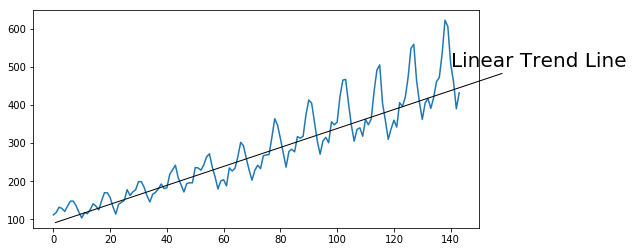

In [2154]:
plt.annotate("Linear Trend Line",size=20, xy=(0, 90), xytext=(140, 500), 
              arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0."))
plt.plot(df['#Passengers'])

This time series has an upward linear
trend and annually seasonal variations. 

$(\alpha+\beta*t+\epsilon)$

# 1. Moving Averages

The **moving averages** method uses the average of the most recent k data values in the time
series as the forecast for the next period. Mathematically, a moving average forecast of
order k is as follows:
moving average forecast of order k

seasonalty time period is t=12 months

$MA_{t+1}$=forecast of the times series for period t+1

$Y_t$= actual value of the time series in period t

$$MA_{t+1}=\frac{\sum(most..recent..k..data..values)}{k}=\frac{Y_t+Y_{t-1}+....+Y_{t-k+1}}{k}$$

The term moving is used because every time a new observation becomes available for
the time series, it replaces the oldest observation in the equation and a new average is
computed. As a result, the average will change, or move, as new observations become
available.

$MA_{13}$=average of months 1–12

$MA_{14}$=average of months 2–13


In [2156]:
t=list(i for i in range(1, 13))
t.extend(t*11)
df['t']=t
df['Yt']=df['#Passengers']

We calculate 12 Months moving averages and plot the original time series and on the
same graph. 

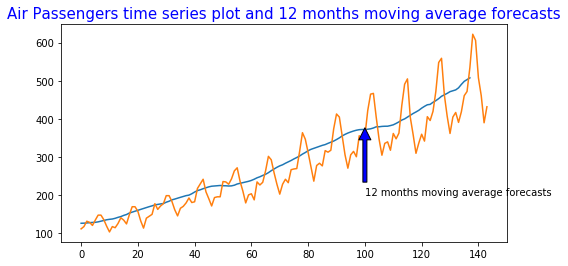

In [2157]:
MA=[]
for i in range (len(df)-6): MA.append(np.mean(df.iloc[i:12+i, 3:4]))
df['MA(12)']=pd.DataFrame(MA)
plt.annotate('12 months moving average forecasts', xy=(100, 385), xytext=(100, 200),
            arrowprops=dict(facecolor='b', shrink=0.05),
            )
plt.title("Air Passengers time series plot and 12 months moving average forecasts", size=15, color='b')
plt.plot(df['MA(12)'])
plt.plot(df['Yt'])

# Calculate the seasonal factors and the seasonal indices.

In order to find the seasonal indices the
seasonal factors **(Actual/Moving Average)** have to be grouped,
averaged and

In [2158]:
df['St, It']=df['Yt']/df['MA(12)']

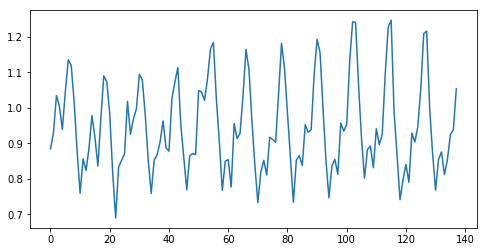

In [2159]:
plt.plot(df['St, It'])

In [2160]:
l=[]
for i in range (12):
    l.append(df['St, It'].iloc[[i,i+12,i+24,i+36,i+48,i+60,i+72,i+84,i+96,i+108,i+120]].mean())
l.extend(l*11)
df['St']=l

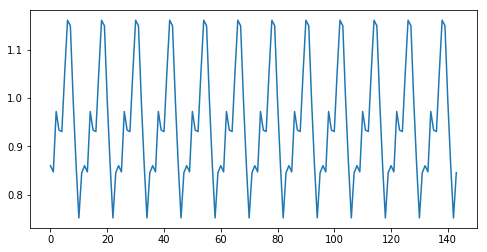

In [2161]:
plt.plot(df['St'])

In [2162]:
df['Deseasonalized']=df['Yt']/df['St']

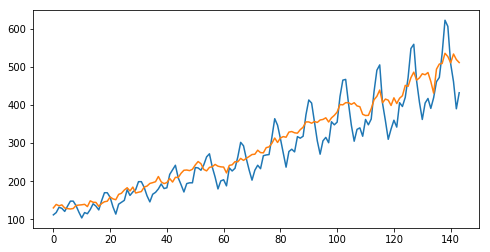

In [2163]:
plt.plot(df['Yt'])
plt.plot(df['Deseasonalized'])

In [2164]:
df['ts']=ts
df.head()

,Month,#Passengers,t,Yt,MA(12),"St, It",St,Deseasonalized,ts
0,1949-01,112,1,112,126.666667,0.884211,0.859806,130.261979,1
1,1949-02,118,2,118,126.916667,0.929744,0.846958,139.322192,2
2,1949-03,132,3,132,127.583333,1.034618,0.972272,135.764440,3
3,1949-04,129,4,129,128.333333,1.005195,0.933599,138.174962,4
4,1949-05,121,5,121,128.833333,0.939198,0.930641,130.017929,5


In [2165]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(df['ts'].to_frame(),df['Deseasonalized'].to_frame())
print("Coef:      {}".format(model.coef_))
print("intercept: {}".format(model.intercept_))

Coef:      [[2.80008486]]
intercept: [92.87976148]


In [2166]:
df['Forecast']=df['St']*(92.87976148+2.80008486*df['ts'])

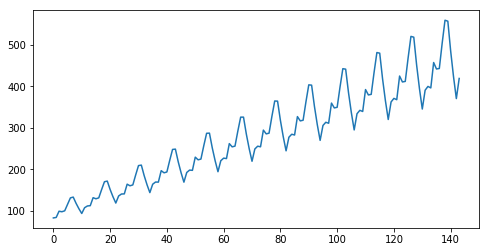

In [2167]:
plt.plot(df['Forecast'])

Text(0.5,1,'RMSE: 17.7351')

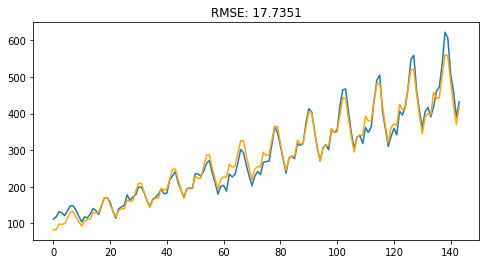

In [2168]:
plt.plot(df['Yt'])
plt.plot(df['Forecast'], color='orange')
plt.title('RMSE: %.4f'% np.sqrt(sum((df['Forecast']-df['Yt'])**2)/len(df)))

In [2169]:
d=pd.DataFrame(pd.period_range('1/1/1949', '12/1/1970', freq='M'), columns=["Month"])
type(d)
#returns
pd._libs.tslib.Timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [2170]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='1/1949', end='1/1971', freq='M')
d = pd.DataFrame(date_rng, columns=['Month'])

In [2171]:
t=[]
for i in range (1,265):
    t.append(i)
d['t']=pd.DataFrame(t)

In [2172]:
l=[]
for i in range (12):
    l.append(df['St, It'].iloc[[i,i+12,i+24,i+36,i+48,i+60,i+72,i+84,i+96,i+108,i+120]].mean())
l.extend(l*21)
d['St']=l
d['Yt']=df['Yt']
d['Forecast']=d['St']*(92.87976148+2.80008486*d['t'])

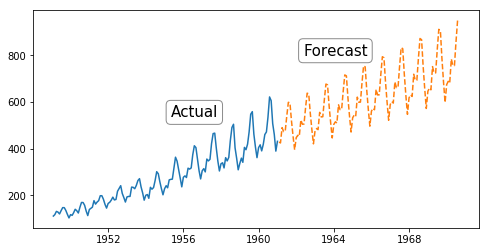

In [2173]:
dates = matplotlib.dates.date2num(d['Month'])
da=pd.DataFrame(dates, columns=['Month'])
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
plt.text(da['Month'].iloc[180:181], d['Forecast'].iloc[260:261], "Forecast", ha="center", va="center", size=15,bbox=bbox_props)
plt.text(da['Month'].iloc[90:91], d['Forecast'].iloc[170:171], "Actual", ha="center", va="center", size=15,bbox=bbox_props)
matplotlib.pyplot.plot_date(dates, d['Yt'], '-')
matplotlib.pyplot.plot_date(da['Month'].iloc[144:260], d['Forecast'].iloc[144:260], '--')

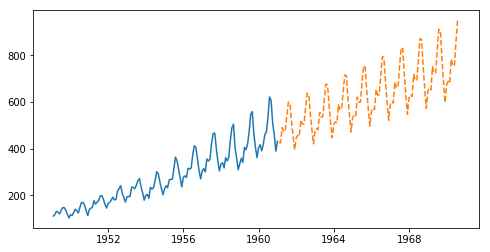

In [2174]:
plt.plot(d['Month'],d['Yt'])
plt.plot(da['Month'].iloc[144:260], d['Forecast'].iloc[144:260], '--')

# 2. Method: Exponential Smoothing

**Exponential smoothing** also uses a weighted average of past time series values as a forecast;
it is a special case of the weighted moving averages method in which we select only
one weight—the weight for the most recent observation. 

Exponential Smoothing Forecast:

$$F_{t+1}=\alpha Y_t+(1-\alpha) F_t$$

where

$F_{t+1}$=forecast of the time series for period t=1

$Y_t$=actual value of the time series in period t

$F_t$=forecast of the time series for period t

$\alpha$=smoothing constant ($0 \le \alpha \le1$)


In [2175]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2176]:
a1=0.1
a2=0.2
a3=0.3
a4=0.4
a5=0.5
S1=[]
S2=[]
S3=[]
S4=[]
S5=[]

for i in range (0, 11): 
    S1.append(a1*(1-a1)**i)
    S2.append(a2*(1-a2)**i)
    S3.append(a3*(1-a3)**i)
    S4.append(a4*(1-a4)**i)
    S5.append(a5*(1-a5)**i)

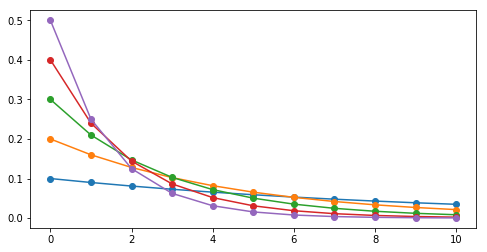

In [2177]:
plt.plot(S1,'o-')
plt.plot(S2,'o-')
plt.plot(S3,'o-')
plt.plot(S4,'o-')
plt.plot(S5,'o-')

In [2181]:
data=pd.read_csv('AirPassenger1.csv')

In [2182]:
data['Yt']=data['#Passengers']

In [2183]:
exp = ExponentialSmoothing(data['Yt']) 
exp_model1 = exp.fit(smoothing_level=0.1) 
exp_model2 = exp.fit(smoothing_level=0.2) 
exp_model3 = exp.fit(smoothing_level=0.3) 
result1 = exp_model1.fittedvalues
result2 = exp_model2.fittedvalues
result3 = exp_model3.fittedvalues

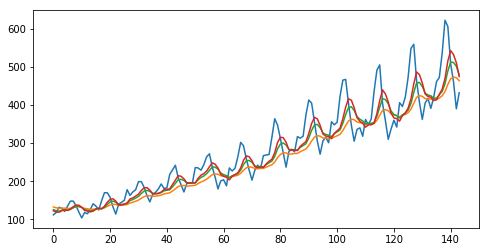

In [2184]:
plt.plot(df['Yt'])
plt.plot(result1)
plt.plot(result2)
plt.plot(result3)

In [2185]:
data['Ft']=result1

In [2186]:
data['St, It']=data['Yt']/data['Ft']

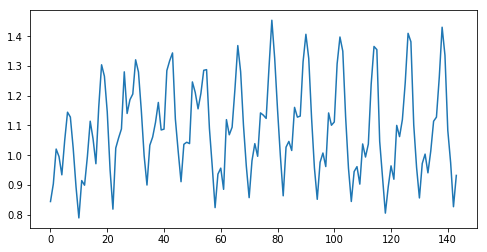

In [2187]:
plt.plot(data['St, It'])

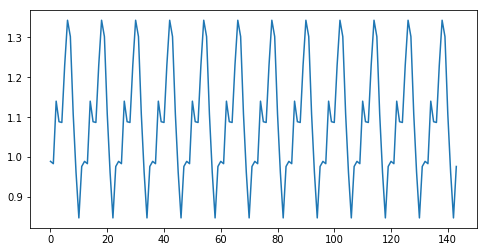

In [2188]:
l=[]
for i in range (12):
    l.append(data['St, It'].iloc[[i,i+12,i+24,i+36,i+48,i+60,i+72,i+84,i+96,i+108,i+120]].mean())
l.extend(l*11)
data['St']=l
plt.plot(data['St'])

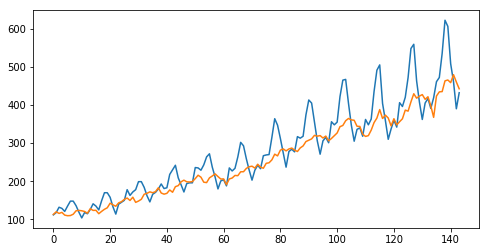

In [2189]:
data['Deseasonalized']=data['Yt']/data['St']
plt.plot(data['Yt'])
plt.plot(data['Deseasonalized'])

In [2190]:
data['ts']=ts
data.head()

,Month,#Passengers,Yt,Ft,"St, It",St,Deseasonalized,ts
0,1949-01,112,112,132.648784,0.844335,0.989218,113.220750,1
1,1949-02,118,118,130.583906,0.903634,0.983462,119.984296,2
2,1949-03,132,132,129.325515,1.020680,1.140114,115.777859,3
3,1949-04,129,129,129.592964,0.995424,1.088634,118.497084,4
4,1949-05,121,121,129.533667,0.934120,1.086712,111.345003,5


In [2191]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(data['ts'].to_frame(),data['Deseasonalized'].to_frame())

In [2192]:
print("Coef:      {}".format(model.coef_))
print("intercept: {}".format(model.intercept_))

Coef:      [[2.44585888]]
intercept: [80.46533305]


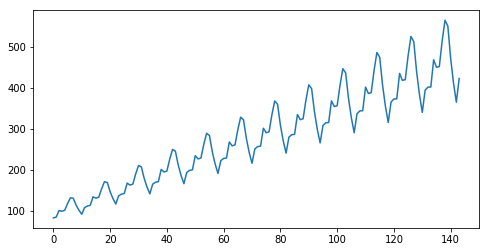

In [2193]:
data['Forecast']=data['St']*(80.46533305+2.44585888*df['ts'])
plt.plot(data['Forecast'])

Text(0.5,1,'RMSE: 19.4454')

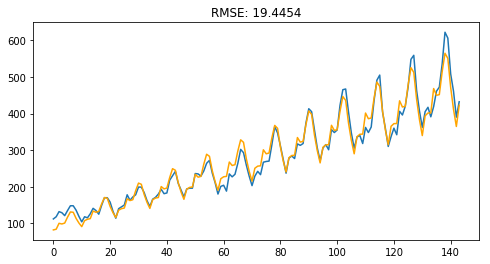

In [2194]:
plt.plot(data['Yt'])
plt.plot(data['Forecast'], color='orange')
plt.title('RMSE: %.4f'% np.sqrt(sum((data['Forecast']-data['Yt'])**2)/len(df)))